In [2]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [49]:
sleep_df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
sleep_df.fillna('None',inplace=True)

In [50]:
sleep_df['Systolic Pressure'] = [int(string[:3]) for string in sleep_df['Blood Pressure']]
sleep_df['Diastolic Pressure'] = [int(string[-2:]) for string in sleep_df['Blood Pressure']]
disorder = sleep_df['Sleep Disorder']
sleep_df.drop(columns=['Blood Pressure','Sleep Disorder','Occupation','Person ID'],inplace=True)

In [51]:
dummy_df = pd.get_dummies(sleep_df)

In [52]:
scaled_data = StandardScaler().fit_transform(dummy_df)

In [53]:
scaled_df = pd.DataFrame(scaled_data)

scaled_df.columns = dummy_df.columns

scaled_df.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Pressure,Diastolic Pressure,Gender_Female,Gender_Male,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,1.654719,-1.619584,-0.330002,-0.268102,-0.989361,0.989361,-1.043736,-0.243906,-0.165748,1.235729
1,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,-0.989361,0.989361,0.958096,-0.243906,-0.165748,-0.809239
2,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,-0.989361,0.989361,0.958096,-0.243906,-0.165748,-0.809239
3,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,-0.989361,0.989361,-1.043736,-0.243906,6.033241,-0.809239
4,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,-0.989361,0.989361,-1.043736,-0.243906,6.033241,-0.809239


In [54]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [55]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(scaled_df)
    inertia.append(model.inertia_)

/Users/Robert/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/Robert/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Robert/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Robert/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Robert/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

In [56]:
# Create a dictionary with the data to plot the Elbow curve
elbow_dict = {'k':k,'inertia':inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_dict)
elbow_df.head()

,k,inertia
0,1,5610.000000
1,2,4175.530151
2,3,3304.746422
3,4,2791.853846
4,5,2184.444413


<Axes: xlabel='k'>

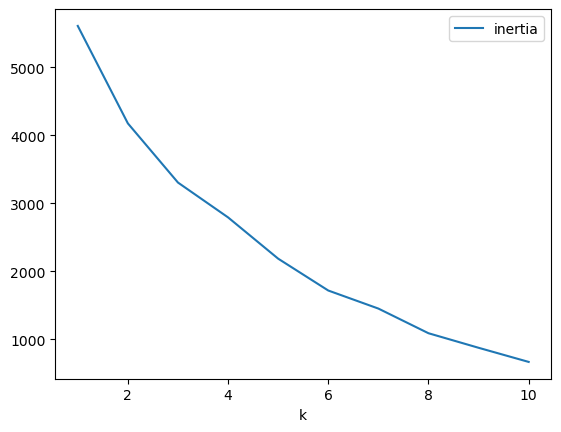

In [57]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow = elbow_df.plot(x='k',y='inertia')
elbow

In [74]:
# Initialize the K-Means model using the best value for k
best_model = KMeans(n_clusters=2)

In [75]:
# Fit the K-Means model using the scaled data
best_model.fit(scaled_df)

/Users/Robert/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [76]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k = best_model.predict(scaled_df)

# Print the resulting array of cluster values.
k

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,

In [77]:
scaled_df_predictions = scaled_df.copy()
scaled_df_predictions['cluster'] = k
scaled_df_predictions['disorder'] = disorder


In [78]:
scaled_df_predictions.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Pressure,Diastolic Pressure,Gender_Female,Gender_Male,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,cluster,disorder
0,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,1.654719,-1.619584,-0.330002,-0.268102,-0.989361,0.989361,-1.043736,-0.243906,-0.165748,1.235729,1,None
1,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,-0.989361,0.989361,0.958096,-0.243906,-0.165748,-0.809239,0,None
2,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,-0.989361,0.989361,0.958096,-0.243906,-0.165748,-0.809239,0,None
3,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,-0.989361,0.989361,-1.043736,-0.243906,6.033241,-0.809239,1,Sleep Apnea
4,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,-0.989361,0.989361,-1.043736,-0.243906,6.033241,-0.809239,1,Sleep Apnea


<Axes: ylabel='Frequency'>

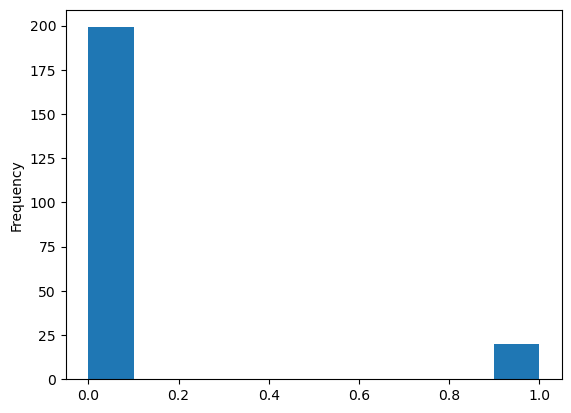

In [81]:
scaled_df_predictions.loc[disorder == 'None','cluster'].plot.hist()